### Overview of the project.
The dataset includes customer reviews for 128k+ Airlines, and I'm excited to analyze it.

The objective of this project is to draw useful conclusions from the data that will help you make some significant decisions. We will first analyze the dataset using several methodologies, and if necessary, clean it. Following that, we'll point out the most significant consumer reviews. Finally, we will graphically display the word frequency using "word clouds" or "tag clouds," where the larger the word in the visual, the more frequently that word was used in the customer review.

I hope you'll enjoy it! So let's get started!

##### Importing require liabraries:-

In [1]:
# Importing the liabrary 'pandas' and the .csv file.
import pandas as pd

# Importing "CountVectorizer" from sklearn for vectorization.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

# Plotting most frequently used words on bar chart.
import matplotlib.pyplot as plt
import seaborn as sns

# Importing "WordCloud" from wordcloud, "Image" from PIL and 'numpy' for wordcloud, image.
from wordcloud import WordCloud
import numpy as np
from PIL import Image

##### Read *.csv file as dataframe through pandas liabrary and show first 5 lines of the dataframe.

In [2]:
df = pd.read_csv('C:/Users/Dell/Documents/Python Projects/Prospect Projects/Airline Review Analysis Part 1 EDA/Publish Project/AirlineReviews.csv')
df.head()

Aircraft    AirlineName      CabinType      DateFlown  \
0            NaN    AB Aviation  Economy Class  November 2019   
1           E120    AB Aviation  Economy Class      June 2019   
2  Embraer E120     AB Aviation  Economy Class      June 2019   
3            NaN  Aerocaribbean  Economy Class            NaN   
4            NaN  Aerocaribbean            NaN            NaN   

              DatePub  EntertainmentRating  FoodRating  GroundServiceRating  \
0  11th November 2019                    0           4                    4   
1      25th June 2019                    0           1                    1   
2      25th June 2019                    0           1                    1   
3  31st December 2010                    0           0                    0   
4  25th November 2010                    0           0                    0   

   OriginCountry  OverallScore  ...                Route SeatComfortRating  \
0    Netherlands           9.0  ...     Moroni to Moheli                 4   
1  UnitedKingdom           1.0  ...    Moroni to Anjouan                 2   
2  UnitedKingdom           1.0  ...  Anjouan to Dzaoudzi                 2   
3        Denmark           8.0  ...                  NaN                 0   
4  UnitedKingdom           1.0  ...                  NaN                 0   

  ServiceRating           Slug                          Title    TravelType  \
0             5    ab-aviation          pretty decent airline  Solo Leisure   
1             2    ab-aviation             Not a good airline  Solo Leisure   
2             1    ab-aviation   flight was fortunately short  Solo Leisure   
3             0  aerocaribbean  Aerocaribbean customer review           NaN   
4             0  aerocaribbean  Aerocaribbean customer review           NaN   

    TripVerified ValueRating WifiRating                             unique_id  
0  Trip Verified           3          0  d3b260fb-268b-4399-8a9b-2804825902c6  
1  Trip Verified           2          0  307711df-268f-4698-97b8-45729b7d972e  
2  Trip Verified           2          0  82bd2602-171d-4724-bde0-90b71621cdcf  
3            NaN           4          0  a927beb4-6244-4f5c-9dc3-09890aa3e616  
4            NaN           0          0  d7bea425-c58a-4a7e-8269-02e0e6516633  

[5 rows x 22 columns]

##### Reviewing the types of all the columns of the dataframe.

In [3]:
# Checking all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Aircraft             36424 non-null   object 
 1   AirlineName          129455 non-null  object 
 2   CabinType            126437 non-null  object 
 3   DateFlown            90993 non-null   object 
 4   DatePub              129455 non-null  object 
 5   EntertainmentRating  129455 non-null  int64  
 6   FoodRating           129455 non-null  int64  
 7   GroundServiceRating  129455 non-null  int64  
 8   OriginCountry        127777 non-null  object 
 9   OverallScore         125124 non-null  float64
 10  Recommended          129455 non-null  object 
 11  Review               128631 non-null  object 
 12  Route                90825 non-null   object 
 13  SeatComfortRating    129455 non-null  int64  
 14  ServiceRating        129455 non-null  int64  
 15  Slug             

##### Checking whether the dataframe has no data for 'Review' column.

In [4]:
# Find the rows where the there is blank for 'Review'
blank_review = df[df['Review'].isna()]
blank_review

Aircraft                AirlineName        CabinType  \
219                NaN      Aerolineas Argentinas   Business Class   
631               A320  Aeroflot Russian Airlines    Economy Class   
744     Boeing 737-800                 Aeromexico  Premium Economy   
979                NaN                 Aeromexico    Economy Class   
1946               NaN                  Air China    Economy Class   
...                ...                        ...              ...   
128144             NaN                   Wizz Air      First Class   
128624             NaN                   Wizz Air    Economy Class   
128640             NaN                   Wizz Air    Economy Class   
128897             NaN                   Wizz Air    Economy Class   
129027            A321                   Wizz Air    Economy Class   

             DateFlown             DatePub  EntertainmentRating  FoodRating  \
219      February 2017  16th February 2017                    4           3   
631      December 2019  14th December 2019                    0           4   
744      December 2022    7th January 2023                    1           1   
979        August 2022    18th August 2022                    0           0   
1946         July 2019      13th July 2019                    0           0   
...                ...                 ...                  ...         ...   
128144   November 2022  23rd December 2022                    0           0   
128624  September 2019  16th November 2019                    1           1   
128640  September 2019   18th October 2019                    1           1   
128897   December 2017       17th May 2018                    0           0   
129027      March 2017     26th March 2017                    0           2   

        GroundServiceRating  OriginCountry  OverallScore  ...  \
219                       4  UnitedKingdom           6.0  ...   
631                       4         Poland           9.0  ...   
744                       4   UnitedStates           2.0  ...   
979                       0         Canada           1.0  ...   
1946                      1   UnitedStates           1.0  ...   
...                     ...            ...           ...  ...   
128144                    1  UnitedKingdom           1.0  ...   
128624                    1        Belgium           1.0  ...   
128640                    1  UnitedKingdom           1.0  ...   
128897                    1   UnitedStates           1.0  ...   
129027                    4   UnitedStates           8.0  ...   

                                      Route SeatComfortRating ServiceRating  \
219         Buenos Aires to London via Rome                 3             4   
631                       Warsaw to Moscow                  4             5   
744                  Seattle to Mexico City                 3             1   
979     San Jose to Toronto via Mexico City                 0             0   
1946               Beijing to San Francisco                 1             1   
...                                     ...               ...           ...   
128144          Keflavik  to London Gatwick                 4             3   
128624                 Brussels to Budapest                 1             3   
128640               Liverpool to Bucharest                 1             1   
128897                      Luton to Prague                 1             1   
129027                     Budapest to Hahn                 3             4   

                             Slug                                Title  \
219         aerolineas-argentinas    average with room for improvement   
631     aeroflot-russian-airlines              very polite and helpful   
744                    aeromexico               Such a bogus airline"    
979                    aeromexico  you can't change your flight date"    
1946                    air-china         Flight attendants don’t care   
...                           ...                 

##### Cleaning the dataframe using Method 1: Removing the rows where there is no data in 'Review' column.

In [5]:
# Removing the rows where there is no data in 'Review' column
# Method 1: Ignore the rows where the data for the column 'Review' is blank
cleaned_review1 = df[df['Review'].notna()]
cleaned_review1.shape[0]

128631

##### Cleaning the dataframe using Method 2: Removing the rows where there is no data in 'Review' column.
Here we will get clear idea regarding no. of records for each dataframes.

In [6]:
# Method 2: Removing the rows where the data fro the column 'Review' is blank
cleaned_review2 = df.dropna(subset=['Review'])
print('Total No of records: ', df.shape[0], '\nMethod 1: cleaned_review1 count: ', cleaned_review1.shape[0], '\nMethod 2: cleaned_review2 count : ', cleaned_review2.shape[0], '\nNo of records with blank in "Review" column: ', df.shape[0] - cleaned_review1.shape[0])

Total No of records:  129455 
Method 1: cleaned_review1 count:  128631 
Method 2: cleaned_review2 count :  128631 
No of records with blank in "Review" column:  824


##### Reviewing just a single column i.e., 'Review'

In [7]:
# Extracted just single column 'Review'
review_column = cleaned_review2['Review']
review_column

0         Moroni to Moheli. Turned out to be a pretty de...
1         Moroni to Anjouan. It is a very small airline....
2         Anjouan to Dzaoudzi. A very small airline and ...
3         Havana - Cayo Coco return. A one hour flight w...
4         Holguin to Havana last week. Okay apart from i...
                                ...                        
129450    This airline is terrible! Timetable changes (m...
129451    We often fly with Wizzair to/from Charleroi/Bu...
129452    Avoid Wizzair! A group of us had our outgoing ...
129453    PRG-LTN and LTN-PRG were rather good flights. ...
129454    London - Kiev. First problem started a few wee...
Name: Review, Length: 128631, dtype: object

##### Now, we will do word vectorization. This will be done with the help of 'sklearn' liabraries.

We are using 'CountVectorizer' & 'text' features which are already imported through 'sklearn' liabrary at the beginning of the project.

There are some words which we should exclude from the contents of the 'Review' column before vectorization. i.e., Non-english words, words like 'a', 'an', 'the', 'to', 'and', 'or' like wise.

In [8]:
# Do not include stopwords (e.g., 'the', 'to', 'and') into text analysis.
stopwords = list(text.ENGLISH_STOP_WORDS)
#Just counting the words included in stopwords by default
stopwords_count = len(stopwords)
print('No. of words in stopwords are: ', stopwords_count)
# Just reviewing the list of stopwords.
stopwords

No. of words in stopwords are:  318


['whereafter',
 'un',
 'also',
 'nobody',
 'four',
 'why',
 'something',
 'anyone',
 'hereafter',
 'noone',
 'might',
 'upon',
 'most',
 'mostly',
 'nine',
 'alone',
 'almost',
 'himself',
 'she',
 'get',
 'under',
 'before',
 'may',
 'nothing',
 'off',
 'yet',
 'could',
 'less',
 'however',
 'while',
 'another',
 'always',
 'give',
 'by',
 'do',
 'via',
 'behind',
 'ours',
 'indeed',
 'few',
 'every',
 'were',
 'will',
 'find',
 'throughout',
 'call',
 'along',
 'see',
 'although',
 'amongst',
 'anything',
 'them',
 'detail',
 'five',
 'thru',
 'anyway',
 'seems',
 'whole',
 'anyhow',
 'in',
 'what',
 'yourself',
 'former',
 'front',
 'whereupon',
 'has',
 'among',
 'yourselves',
 'around',
 'have',
 'no',
 'some',
 'except',
 'from',
 'eight',
 'mine',
 'such',
 'within',
 'beyond',
 'everything',
 'ten',
 'least',
 'eg',
 'hundred',
 'hereby',
 'sincere',
 'somewhere',
 'fifty',
 'etc',
 'ever',
 'thereafter',
 'con',
 'made',
 'either',
 'neither',
 'to',
 'who',
 'hers',
 'someone

In [9]:
# Use this, in case if you do not want to remove non-english language characters.
# Code without removing non-english language characters.
#vectorizer = CountVectorizer()
# Code to remove non-english language characters.
vectorizer = CountVectorizer(token_pattern=r'\b[A-Za-z]+\b', stop_words=stopwords)

##### We are fitting the data & transforming into sparse matrix.

In [10]:
# Fit & transform the 'Review' column
review_vector = vectorizer.fit_transform(review_column)
review_vector

<128631x54148 sparse matrix of type '<class 'numpy.int64'>'
	with 6505875 stored elements in Compressed Sparse Row format>

##### Transformed Matrix will be transferred into dataframe.

In [11]:
# Sparse matrix to dataframe
review_vector_df = pd.DataFrame.sparse.from_spmatrix(review_vector, columns=vectorizer.get_feature_names_out())
print(review_vector_df.head())

   aa  aaa  aaaa  aaaaahhhh  aaadvantage  aabay  aaccess  aadhar  aadmirals  \
0   0    0     0          0            0      0        0       0          0   
1   0    0     0          0            0      0        0       0          0   
2   0    0     0          0            0      0        0       0          0   
3   0    0     0          0            0      0        0       0          0   
4   0    0     0          0            0      0        0       0          0   

   aadvantage  ...  zweimal  zx  zya  zyl  zytl  zz  zzurich  zzz  zzza  zzzz  
0           0  ...        0   0    0    0     0   0        0    0     0     0  
1           0  ...        0   0    0    0     0   0        0    0     0     0  
2           0  ...        0   0    0    0     0   0        0    0     0     0  
3           0  ...        0   0    0    0     0   0        0    0     0     0  
4           0  ...        0   0    0    0     0   0        0    0     0     0  

[5 rows x 54148 columns]


##### Here, we will calculate the frequency of the words.

In [12]:
# Calculate the words frequencies.
word_freq = review_vector_df.sum(axis=0)
word_freq

aa             3358
aaa               8
aaaa              1
aaaaahhhh         1
aaadvantage       2
               ... 
zz                1
zzurich           1
zzz               2
zzza              1
zzzz              1
Length: 54148, dtype: int64

##### Sorting the words by the frequency in decending order.

In [13]:
# Sorting the word by the frequency in decending order.
sorted_word_freq = word_freq.sort_values(ascending=False)
sorted_word_freq

flight     247616
t           80382
service     77084
time        74310
airline     58525
            ...  
lighs           1
lig             1
liftet          1
lifters         1
zzzz            1
Length: 54148, dtype: int64

In [14]:
#Select top 50 most frequently used words.
top_50_words = sorted_word_freq.head(50)
top_50_words

flight        247616
t              80382
service        77084
time           74310
airline        58525
seats          48637
good           48626
food           48509
seat           48450
staff          48105
flights        46240
hours          45230
plane          44061
airport        43286
crew           42975
check          42461
airlines       40537
s              36646
fly            35407
cabin          34016
told           32580
class          32311
just           31542
did            30995
hour           30667
air            30403
experience     29179
boarding       29066
customer       28463
business       28388
passengers     28059
delayed        27418
return         26937
got            25911
new            25220
luggage        25149
minutes        22622
economy        21722
gate           21346
day            21110
way            21110
flying         20913
like           20528
didn           20428
pay            20365
aircraft       20359
trip           19886
ticket       

##### After reviewing top 50 most frequently used words. We can observe that there are some single letter e.g., 't', 's', and other words 'did' which should not be there so we will remove them from the list.

In [15]:
# Add the letters/words which you want to exclude from the list.
add_stopwords = ['t', 's', 'did', 'didn']
stopwords.extend(add_stopwords)
stopwords_count = len(stopwords)
print('No. of words in stopwords are: ', stopwords_count)
# Just reviewing the list of stopwords again.
stopwords

No. of words in stopwords are:  322


['whereafter',
 'un',
 'also',
 'nobody',
 'four',
 'why',
 'something',
 'anyone',
 'hereafter',
 'noone',
 'might',
 'upon',
 'most',
 'mostly',
 'nine',
 'alone',
 'almost',
 'himself',
 'she',
 'get',
 'under',
 'before',
 'may',
 'nothing',
 'off',
 'yet',
 'could',
 'less',
 'however',
 'while',
 'another',
 'always',
 'give',
 'by',
 'do',
 'via',
 'behind',
 'ours',
 'indeed',
 'few',
 'every',
 'were',
 'will',
 'find',
 'throughout',
 'call',
 'along',
 'see',
 'although',
 'amongst',
 'anything',
 'them',
 'detail',
 'five',
 'thru',
 'anyway',
 'seems',
 'whole',
 'anyhow',
 'in',
 'what',
 'yourself',
 'former',
 'front',
 'whereupon',
 'has',
 'among',
 'yourselves',
 'around',
 'have',
 'no',
 'some',
 'except',
 'from',
 'eight',
 'mine',
 'such',
 'within',
 'beyond',
 'everything',
 'ten',
 'least',
 'eg',
 'hundred',
 'hereby',
 'sincere',
 'somewhere',
 'fifty',
 'etc',
 'ever',
 'thereafter',
 'con',
 'made',
 'either',
 'neither',
 'to',
 'who',
 'hers',
 'someone

##### We have to re-run the few steps again to check an update in the frequently used words. We just show the last output to compare and we will ignore to print other output as they are already explained above.

In [16]:
# Steps already followed earlier but this time we exclude more words through 'stop_words'
vectorizer = CountVectorizer(token_pattern=r'\b[A-Za-z]+\b', stop_words=stopwords)
review_vector = vectorizer.fit_transform(review_column)
review_vector_df = pd.DataFrame.sparse.from_spmatrix(review_vector, columns=vectorizer.get_feature_names_out())
word_freq = review_vector_df.sum(axis=0)
sorted_word_freq = word_freq.sort_values(ascending=False)
top_50_words = sorted_word_freq.head(50)
top_50_words

flight           247616
service           77084
time              74310
airline           58525
seats             48637
good              48626
food              48509
seat              48450
staff             48105
flights           46240
hours             45230
plane             44061
airport           43286
crew              42975
check             42461
airlines          40537
fly               35407
cabin             34016
told              32580
class             32311
just              31542
hour              30667
air               30403
experience        29179
boarding          29066
customer          28463
business          28388
passengers        28059
delayed           27418
return            26937
got               25911
new               25220
luggage           25149
minutes           22622
economy           21722
gate              21346
day               21110
way               21110
flying            20913
like              20528
pay               20365
aircraft        

##### Let's display the frequently used words in bar chart using 'matplotlib' and 'seaborn' liabraries.

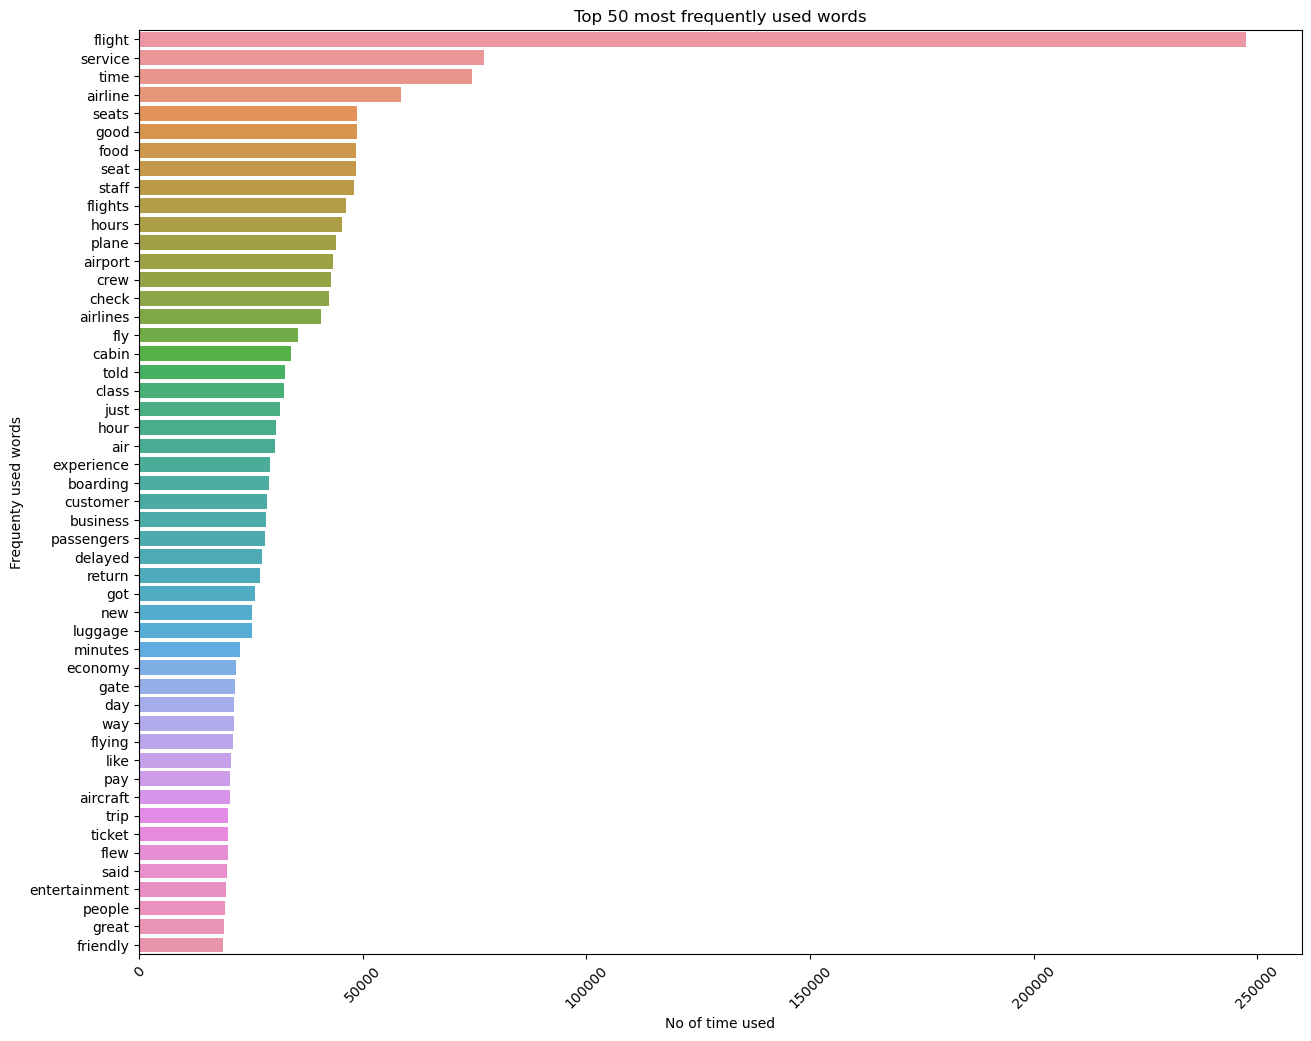

In [17]:
# Plotting the most frequently used words on bar chart.
plt.figure(figsize=(15,12))
sns.barplot(x=top_50_words.values, y=top_50_words.index)
plt.title('Top 50 most frequently used words')
plt.xlabel('No of time used')
plt.ylabel('Frequenty used words')
plt.xticks(rotation=45)
plt.show()

##### Final step: Let's display the 'Review' column words graphically using "word clouds". Most frequently used words will be more larger than compared to others words.
Here, I have tried to show the words in image of plane just for fun!!

In [18]:
#Concatenate all the words into single string
words_to_string = ' '.join(review_column.astype(str))
#print(len(words_to_string))

In [19]:
#Importing plane image *.png file using 'numpy' and 'Image' from 'PIL' liabraries.
plane_img = np.array(Image.open('C:/Users/Dell/Documents/Python Projects/Prospect Projects/Airline Review Analysis Part 1 EDA/Publish Project/plane_img.png'))
#plane_img

##### Creting wordcloud.

In [20]:
# Creating wordcloud using 'WordCloud' librariry in the image of plane.
wordcloud = WordCloud(mask=plane_img, background_color='white', collocations=False, contour_width=2, contour_color='black').generate(words_to_string)
#wordcloud

##### We are adding some custom colors of the fonts.

In [21]:
# Define custom colors for the wordcloud
colors = ["darkviolet", "mediumpurple", "mediumorchid", "mediumvioletred", "magenta"]

##### Let's generate WordCloud.

In [22]:
# Generate the wordcloud with custom colors
wordcloud = wordcloud.recolor(color_func=lambda *args, **kwargs: colors[np.random.randint(0, len(colors))])

##### Final step: To plot the wordcloud data into the image.

In [23]:
# Plotting the wordcloud with the plane shape in custom colors and saving/plotting the final image in *.png format.
plt.figure(figsize=(100, 100))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()

### Thank you for spending time to check this project.
I will try to post some more & distinguish projects. See you soon!!